In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import os
import pandas as pd

In [3]:
# Open the JSON file
with open('DataCollection/CoqTheorems.json') as f:
    # Load the JSON data into a Python dictionary
    theorem_data = json.load(f)

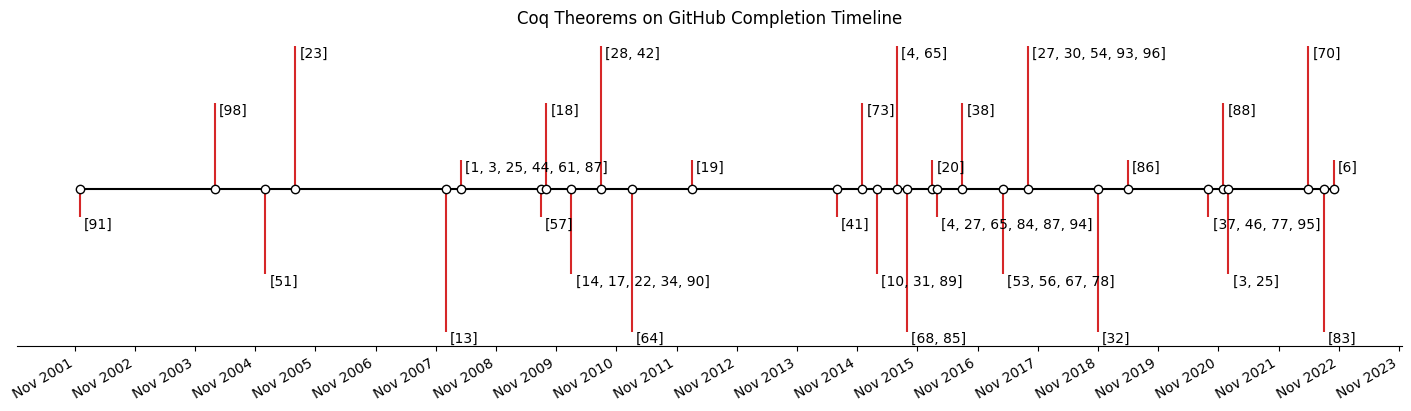

In [137]:
#################################
#### latest activity timeline ###
#################################
commits = []
last_commit_date =  []
names = []
for element in theorem_data:
    if isinstance(element, dict):
        for sources in element['sources']:
            if 'commits' in sources:
                commit = sources['commits']
                count = len(commit)
                if len(commit) > 0:
                    # Only append to plot if it has commits
                    commits.append(count)
                    names.append(element['theorem_number'])
                    last_commit_date.append(commit[len(commit) - 1]['date'])
    else:
        print("Each element in the JSON file must be a dictionary.")

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S%z") for d in last_commit_date]

# Create a dataframe
df = pd.DataFrame({'Commits': commits, 'Dates': dates, 'Names': names})
# Localize time zones
df['Dates'] = pd.to_datetime(df['Dates'], utc=True)
df['Dates'] = df['Dates'].dt.tz_convert('US/Eastern')
# Bin dataframe by month
bins = pd.date_range(start=df['Dates'].min() - timedelta(days=1) , end=df['Dates'].max() + timedelta(days=31) , freq='M')
df['bins'] = pd.cut(x=df['Dates'], bins=bins, labels = [d.strftime('%b-%Y') for d in bins][:-1], include_lowest=True)
# Aggregate bins
agg = df.groupby('bins')['Names'].aggregate(list)

# Choose some nice levels
map = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(agg)/6)))[:len(agg)]
levels = []
present_bins = []
for idx in range(len(agg)):
    if (len(agg[idx])) > 0:
        levels.append(map[-1])
        map = map[:-1]
        present_bins.append(bins[idx])
    else:
        levels.append(0)
levels.append(0)

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(14, 4), layout="constrained")
ax.set(title="Coq Theorems on GitHub Completion Timeline")

ax.vlines(bins, ymin=0, ymax=levels, color="tab:red")  # The vertical stems.
ax.plot(present_bins, np.zeros_like(present_bins), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(bins, levels, agg):
    if (len(r) > 0):
        ax.annotate(r, xy=(d, l),
                    xytext=(3, 0), textcoords="offset points",
                    rotation=0,
                    horizontalalignment="left",
                    verticalalignment="top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

Text(0.5, 1.0, '\nTheorem 41 excluded as outlier')

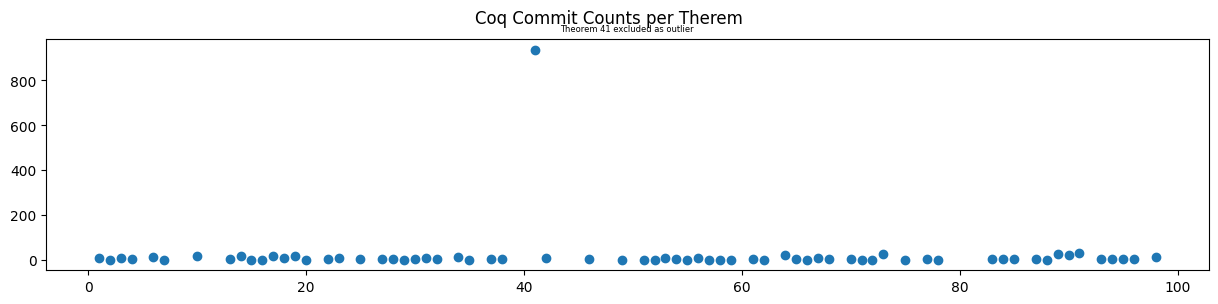

In [6]:
################################
#### Commit Counts per Therem ###
#################################

# These are here because of a JSON bug in theorem 96 of Lean.
# # Plot a histogram of the lengths using matplotlib
plt.figure(figsize=(15, 3))
plt.scatter(names, commits)
plt.suptitle('Coq Commit Counts per Therem\n')
plt.title('\nTheorem 41 excluded as outlier', fontsize = 6)
# plt.show()

[Text(0.5, 1.0, 'Coq number of commits per year')]

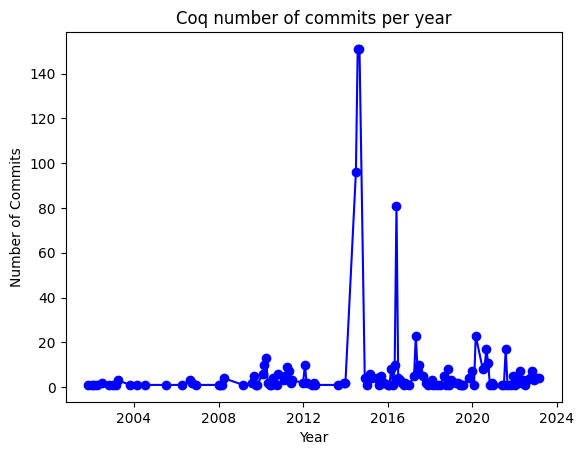

In [7]:
#################################
#### Number of Commits over time ###
#################################
dates = []
# Loop through each element in the list
for element in theorem_data:
    # Check if the element is a dictionary
    if isinstance(element, dict):
        # Get the length of the dictionary (i.e., the number of key-value pairs)
        sources = element['sources'][0]
        if 'commits' in sources:
            commits = sources['commits']
            if len(commits) > 0:
                for commit in commits:
                    dates.append(datetime.strptime(commit['date'], "%Y-%m-%dT%H:%M:%S%z"))
    else:
        # If it's not a dictionary, print an error message
        print("Each element in the JSON file must be a dictionary.")
# Count the number of commits per month of each year
counts = {}
for date in dates:
    year_month = date.strftime("%Y-%m")
    if year_month in counts:
        if counts[year_month] > 150 :
            continue
        counts[year_month] += 1
    else:
        counts[year_month] = 1


# Sort the counts by year and month
counts = dict(sorted(counts.items()))
# Extract the years and months from the keys and values
x_values = [datetime.strptime(year_month, "%Y-%m") for year_month in counts.keys()]
y_values = list(counts.values())

# Create a timeline plot with the counts
fig, ax = plt.subplots()
ax.plot_date(x_values, y_values, fmt="bo-", xdate=True, ydate=False)

# Set the x-axis tick labels to show the year and month
date_formatter = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_formatter)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Commits")
ax.set(title= "Coq number of commits per year")
# plt.show()

incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incr

Text(0.5, 1.0, 'Coq Pull Request State')

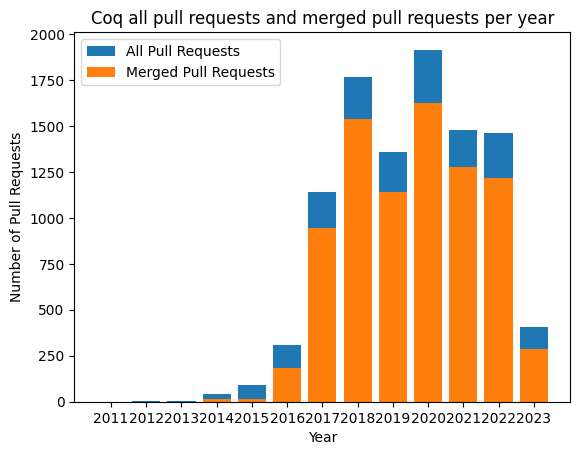

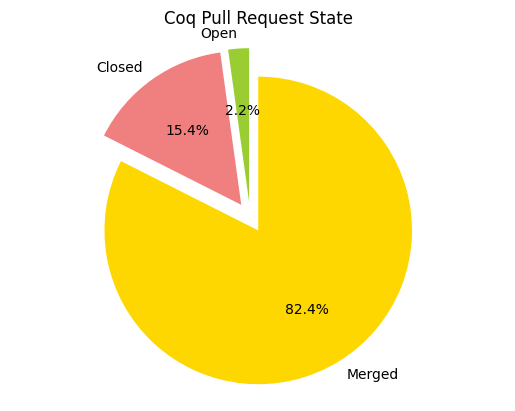

In [8]:
#################################
#### all pull requests and merged pull requests###
#################################

# Initialize an empty list to store the JSON data
coq_pr_data = []

# Loop through each file in the folder
for filename in os.listdir('DataCollection/coq-prs'):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        # Read the JSON data from the file
        with open(os.path.join('DataCollection/coq-prs', filename), "r") as f:
            coq_pr = json.load(f)
        # Append the JSON data to the list
        coq_pr_data.extend(coq_pr)

pull_dates= []
merge_dates= []
open_count = 0
closed_count = 0
merged_count =0

for element in coq_pr_data:
    pull_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    if element['state'] == 'open':
        open_count += 1
    elif element['state'] == 'merged':
        merged_count += 1
        merge_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    elif element['state'] == 'closed':
        x = element['discussion']
        for i in x :
            if i['author'] == 'bors[bot]' :
                msg = i['comment']
                txt = 'Pull request successfully merged into master.'
                if os.path.commonprefix([msg,txt]) == txt :
                    merged_count += 1
                    merge_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
                    continue
        closed_count += 1

# Count the number of pull requests and merged pull requests per year
pull_counts = {}
merge_counts = {}
for date in pull_dates:
    year = date.strftime("%Y")
    if year in pull_counts:
        pull_counts[year] += 1
        print('incremented')
    else:
        pull_counts[year] = 1
for date in merge_dates:
    year = date.strftime("%Y")
    if year in merge_counts:
        print('incremented')
        merge_counts[year] += 1
    else:
        merge_counts[year] = 1

# Sort the counts by year
pull_counts = dict(sorted(pull_counts.items()))
merge_counts = dict(sorted(merge_counts.items()))
# Extract the years from the keys and values
y_pull_values = list(pull_counts.values())
y_merge_values = []
for year in pull_counts.keys():
    if year in merge_counts:
        y_merge_values.append(merge_counts[year])
    else:
        y_merge_values.append(0)

# Create a line chart with the counts
fig, ax = plt.subplots()
#ax.plot_date(x_values, y_pull_values, fmt="bo-", xdate=True, ydate=False, label="All Pull Requests")
#ax.plot_date(x_values, y_merge_values, fmt="bo-", xdate=True, ydate=False, label="All Pull Requests")
ax.bar(pull_counts.keys(), y_pull_values, label="All Pull Requests")
ax.bar(pull_counts.keys(), y_merge_values, label="Merged Pull Requests")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Pull Requests")
ax.set(title= "Coq all pull requests and merged pull requests per year")
ax.legend()
# plt.show()

# Create a pie chart with the counts
labels = ["Open", "Closed", "Merged"]
sizes = [open_count, closed_count, merged_count]
colors = ["yellowgreen", "lightcoral", "gold"]
explode = (0.1, 0.1, 0.1)  # explode the Open slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Coq Pull Request State")
# plt.show()

Text(0.5, 1.0, 'Coq Issues State')

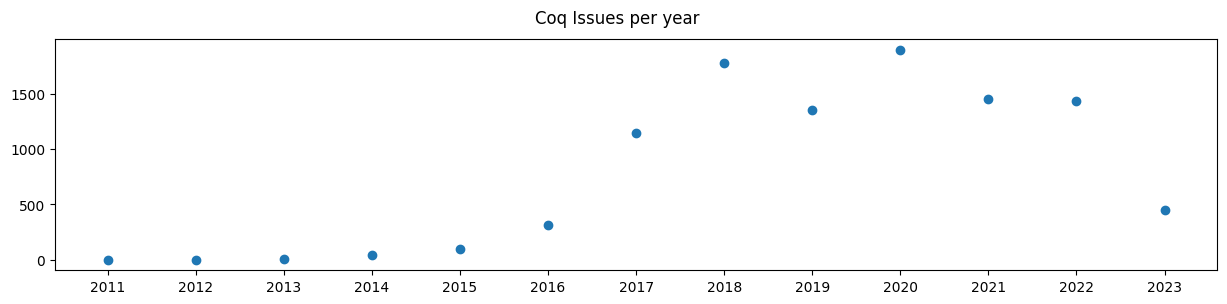

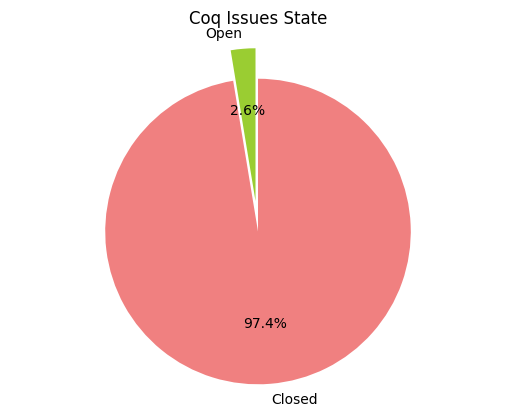

In [9]:
# Initialize an empty list to store the JSON data
coq_issue_data = []

# Loop through each file in the folder
for filename in os.listdir('DataCollection/coq-issues'):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        filepath = os.path.join('DataCollection/coq-issues', filename)
        try:
            with open(filepath) as f:
                data = json.load(f)
                coq_issue_data.extend(data)
        except json.JSONDecodeError:
            pass

issues_dates= []
open_issue_count = 0
closed_issue_count = 0

for element in coq_issue_data:
    issues_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    if element['state'] == 'open':
        open_issue_count += 1
    elif element['state'] == 'closed':
        closed_issue_count += 1

# Count the number of pull requests and merged pull requests per year
issue_counts = {}
for date in issues_dates:
    year = date.strftime("%Y")
    if year in issue_counts:
        issue_counts[year] = issue_counts.get(year, 0) + 1
    else:
        issue_counts[year] = 1

# Sort the counts by year
issue_counts = dict(sorted(issue_counts.items()))
plt.figure(figsize=(15, 3))
plt.scatter(issue_counts.keys(), issue_counts.values())
plt.suptitle("Coq Issues per year")
# plt.show()

# Create a pie chart with the counts
labels = ["Open", "Closed"]
sizes = [open_issue_count, closed_issue_count]
colors = ["yellowgreen", "lightcoral"]
explode = (0.1, 0.1)  # explode the Open slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Coq Issues State")
# plt.show()